In [57]:
from gensim.models import Word2Vec
import pandas as pd
import numpy as np
import re

In [58]:
with open('stop_words.txt', 'r', encoding= 'utf-8') as f:
    stop_words = [sw.replace('\n', '').replace('\t', '') for sw in f.readlines()]
    f.close

In [59]:
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 't

In [60]:
data = pd.read_csv('Hotel_Reviews.csv', sep = ',')
print(data.head())

                                       Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                     

In [61]:
scores = data['Reviewer_Score']
neg_review = list(data['Negative_Review'])
pos_review = list(data['Positive_Review'])

### Stopwords Removal
- Remove all the stopwords
- Stopwords list: http://www.ranks.nl/stopwords

In [62]:
for i in range(len(neg_review)):
    neg_review[i] = [word.lower() for word in neg_review[i].split() if word.lower() not in stop_words]
    pos_review[i] = [word.lower() for word in pos_review[i].split() if word.lower() not in stop_words]

In [63]:
print(neg_review[0])
print(pos_review[0])

['angry', 'made', 'post', 'available', 'via', 'possible', 'sites', 'use', 'planing', 'trips', 'one', 'will', 'make', 'mistake', 'booking', 'place', 'made', 'booking', 'via', 'booking', 'com', 'stayed', '6', 'nights', 'hotel', '11', '17', 'july', 'upon', 'arrival', 'placed', 'small', 'room', '2nd', 'floor', 'hotel', 'turned', 'room', 'booked', 'specially', 'reserved', '2', 'level', 'duplex', 'room', 'big', 'windows', 'high', 'ceilings', 'room', 'ok', 'don', 't', 'mind', 'broken', 'window', 'can', 'closed', 'hello', 'rain', 'mini', 'fridge', 'contained', 'sort', 'bio', 'weapon', 'least', 'guessed', 'smell', 'intimately', 'asked', 'change', 'room', 'explaining', '2', 'times', 'booked', 'duplex', 'btw', 'costs', 'simple', 'double', 'got', 'way', 'volume', 'due', 'high', 'ceiling', 'offered', 'room', 'next', 'day', 'check', 'next', 'day', '11', 'o', 'clock', 'order', 'get', 'room', 'waned', 'best', 'way', 'begin', 'holiday', 'wait', 'till', '13', '00', 'order', 'check', 'new', 'room', 'wond

In [64]:
for i in range(len(neg_review)):
    neg_review[i] = [word for word in neg_review[i] if re.match('^[a-zA-Z]+$', word)]
    pos_review[i] = [word for word in pos_review[i] if re.match('^[a-zA-Z]+$', word)]

In [65]:
print(neg_review[0])
print(pos_review[0])

['angry', 'made', 'post', 'available', 'via', 'possible', 'sites', 'use', 'planing', 'trips', 'one', 'will', 'make', 'mistake', 'booking', 'place', 'made', 'booking', 'via', 'booking', 'com', 'stayed', 'nights', 'hotel', 'july', 'upon', 'arrival', 'placed', 'small', 'room', 'floor', 'hotel', 'turned', 'room', 'booked', 'specially', 'reserved', 'level', 'duplex', 'room', 'big', 'windows', 'high', 'ceilings', 'room', 'ok', 'don', 't', 'mind', 'broken', 'window', 'can', 'closed', 'hello', 'rain', 'mini', 'fridge', 'contained', 'sort', 'bio', 'weapon', 'least', 'guessed', 'smell', 'intimately', 'asked', 'change', 'room', 'explaining', 'times', 'booked', 'duplex', 'btw', 'costs', 'simple', 'double', 'got', 'way', 'volume', 'due', 'high', 'ceiling', 'offered', 'room', 'next', 'day', 'check', 'next', 'day', 'o', 'clock', 'order', 'get', 'room', 'waned', 'best', 'way', 'begin', 'holiday', 'wait', 'till', 'order', 'check', 'new', 'room', 'wonderful', 'waist', 'time', 'room', 'got', 'just', 'wan

In [66]:
total_reviews = neg_review + pos_review

In [67]:
cnt = 0
for i in range(len(neg_review)):
    if len(neg_review[i]) < 10 or len(pos_review[i]) < 10:
        cnt += 1
print(cnt/len(neg_review))

0.8796889118118114


In [68]:
for i in range(len(neg_review)):
    if len(neg_review[i]) > 10 or len(pos_review[i]) > 10:
        neg_review[i] = pos_review[i] = None

In [69]:
neg_review = [rev for rev in neg_review if rev is not None] 
pos_review = [rev for rev in pos_review if rev is not None]

In [70]:
print(len(neg_review))
print(len(pos_review))

270901
270901


In [71]:
print(neg_review[0])
print(pos_review[0])

['water', 'pressure', 'shower', 'existent', 'feel', 'bad', 'even', 'saying']
['staff', 'amazing', 'friendly', 'proud', 'place', 'work', 'cafe', 'cool', 'will', 'back']


In [72]:
model = Word2Vec(total_reviews, size = 50, window = 5, min_count = 5, workers = 4)
model.init_sims(replace = True)

In [ ]:
neg_embed = np.zeros((10000,10,50))
pos_embed = np.zeros((10000,10,50))
for i in range(10000):
    #print(i)
    for j in range(10):
        try:
            neg_embed[i][j] = model[neg_review[i][j]]
        except:
            pass
        try:
            pos_embed[i][j] = model[pos_review[i][j]]
        except:
            pass

In [74]:
print(neg_embed.shape)
print(pos_embed.shape)

(10000, 10, 50)
(10000, 10, 50)


In [ ]:
print(neg_embed[0])
print(neg_embed[10])
print(pos_embed[0])
print(pos_embed[10])

In [76]:
scores = np.array(list(scores)[:10000])

In [77]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(pos_embed, scores, test_size = 0.4, random_state = 777)

### CNN Model

In [136]:
X_train = X_train.reshape(X_train.shape[0], 10, 50, 1)
X_test = X_test.reshape(X_test.shape[0], 10, 50, 1)

In [127]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6000, 10, 50, 1)
(4000, 10, 50, 1)
(6000,)
(4000,)


In [117]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [118]:
def create_model():
    model = Sequential()
    model.add(Conv2D(filters = 3, input_shape = (10, 50, 1), kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(1))
    
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

In [ ]:
cnn_model = create_model()
cnn_model.fit(X_train, y_train, epochs = 1000, batch_size = 50)

In [55]:
results = cnn_model.evaluate(X_test, y_test)

3488/4000 [=========================>....] - ETA: 0s

In [56]:
print(results)

3.73726128006


In [128]:
history_cnn = cnn_model.fit(X_train, y_train, validation_split = 0.33, epochs = 100, batch_size = 50, verbose = 1)

Train on 4019 samples, validate on 1981 samples
Epoch 1/100
4019/4019 [==============================] - 0s - loss: 2.9772 - val_loss: 2.6743
Epoch 2/100
4019/4019 [==============================] - 0s - loss: 2.7442 - val_loss: 2.7669
Epoch 3/100
4019/4019 [==============================] - 0s - loss: 2.6691 - val_loss: 2.7320
Epoch 4/100
4019/4019 [==============================] - 0s - loss: 2.6023 - val_loss: 2.7086
Epoch 5/100
4019/4019 [==============================] - 0s - loss: 2.4837 - val_loss: 2.6574
Epoch 6/100
4019/4019 [==============================] - 0s - loss: 2.4097 - val_loss: 2.6720
Epoch 7/100
4019/4019 [==============================] - 0s - loss: 2.3857 - val_loss: 2.6827
Epoch 8/100
4019/4019 [==============================] - 0s - loss: 2.3582 - val_loss: 2.6646
Epoch 9/100
4019/4019 [==============================] - 0s - loss: 2.3318 - val_loss: 2.7797
Epoch 10/100
4019/4019 [==============================] - 0s - loss: 2.2919 - val_loss: 2.7206
Epoch 11/10

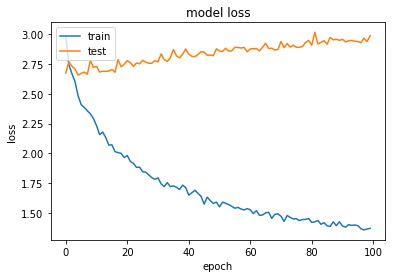

In [129]:
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Grid seach for CNN

In [135]:
from sklearn.model_selection import GridSearchCV
from keras import optimizers
from keras.wrappers.scikit_learn import KerasRegressor

In [142]:
def grid_model(filter_size = 3, dropout_rate = 0.2, learning_rate = 0.01):
    model = Sequential()
    model.add(Conv2D(filters = filter_size, input_shape = (10, 50, 1), kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(dropout_rate))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    
    adam = optimizers.Adam(lr = learning_rate)
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

In [143]:
# kernels = np.array([(3,), (4,), (5,)])
filters = np.array([3,5,7])
dropouts = np.array([0.2, 0.3, 0.5])
epochs = np.array([100, 200, 300])
batches = np.array([30, 50, 100])

param_grid = dict(filter_size = filters, dropout_rate = dropouts, epochs = epochs, batch_size = batches)

In [144]:
grid_model = KerasRegressor(build_fn = grid_model, verbose = 1)
grid = GridSearchCV(estimator = grid_model, param_grid = param_grid)

In [ ]:
grid_result = grid.fit(X_train, y_train)

In [146]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
	print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 4.108682 using {'batch_size': 100, 'dropout_rate': 0.20000000000000001, 'epochs': 300, 'filter_size': 3}
3.798725 (0.083167) with: {'batch_size': 30, 'dropout_rate': 0.20000000000000001, 'epochs': 100, 'filter_size': 3}
3.868433 (0.072880) with: {'batch_size': 30, 'dropout_rate': 0.20000000000000001, 'epochs': 100, 'filter_size': 5}
3.914245 (0.129838) with: {'batch_size': 30, 'dropout_rate': 0.20000000000000001, 'epochs': 100, 'filter_size': 7}
3.881773 (0.080156) with: {'batch_size': 30, 'dropout_rate': 0.20000000000000001, 'epochs': 200, 'filter_size': 3}
3.950605 (0.039030) with: {'batch_size': 30, 'dropout_rate': 0.20000000000000001, 'epochs': 200, 'filter_size': 5}
3.993800 (0.174091) with: {'batch_size': 30, 'dropout_rate': 0.20000000000000001, 'epochs': 200, 'filter_size': 7}
3.777797 (0.090928) with: {'batch_size': 30, 'dropout_rate': 0.20000000000000001, 'epochs': 300, 'filter_size': 3}
3.929649 (0.071454) with: {'batch_size': 30, 'dropout_rate': 0.20000000000000001, 'e

C:\Users\Buomsoo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


### MLP

In [100]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasRegressor
from keras.constraints import maxnorm

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt

In [122]:
X_train = X_train.reshape(X_train.shape[0], 10*50)
X_test = X_test.reshape(X_test.shape[0], 10*50)

In [80]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6000, 500)
(4000, 500)
(6000,)
(4000,)


In [82]:
def mlp_model():
    model = Sequential()
    model.add(Dense(200, input_dim = 500, activation = 'relu'))
    model.add(Dense(200, activation = 'relu'))
    model.add(Dense(200, activation = 'relu'))
    model.add(Dense(1))
    
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    
    return model

In [85]:
seed = 7
np.random.seed(7)

In [92]:
estimator = KerasRegressor(build_fn = mlp_model, epochs = 100, batch_size = 50, verbose = 1)
kfold = KFold(n_splits = 5, random_state = seed)

In [ ]:
results = cross_val_score(estimator, X_train, y_train, cv = kfold)

In [95]:
print("MLP: %.2f (%.2f) MSE" % (results.mean(), results.std()))

MLP: 4.49 (0.15) MSE


### Visualize model training & validation

In [96]:
mlp_model = mlp_model()
history = mlp_model.fit(X_train, y_train, validation_split = 0.33, epochs = 100, batch_size = 50, verbose = 1)

Train on 4019 samples, validate on 1981 samples
Epoch 1/100
4019/4019 [==============================] - 0s - loss: 17.3003 - val_loss: 4.0601
Epoch 2/100
4019/4019 [==============================] - 0s - loss: 3.5624 - val_loss: 3.5000
Epoch 3/100
4019/4019 [==============================] - 0s - loss: 2.8931 - val_loss: 3.4343
Epoch 4/100
4019/4019 [==============================] - 0s - loss: 2.5797 - val_loss: 3.4184
Epoch 5/100
4019/4019 [==============================] - 0s - loss: 2.3691 - val_loss: 3.6311
Epoch 6/100
4019/4019 [==============================] - 0s - loss: 2.2105 - val_loss: 3.6392
Epoch 7/100
4019/4019 [==============================] - 0s - loss: 2.0465 - val_loss: 3.6023
Epoch 8/100
4019/4019 [==============================] - 0s - loss: 1.9147 - val_loss: 3.6604
Epoch 9/100
4019/4019 [==============================] - 0s - loss: 1.8351 - val_loss: 3.6369
Epoch 10/100
4019/4019 [==============================] - 0s - loss: 1.7079 - val_loss: 3.7038
Epoch 11/1

In [98]:
print(history.history.keys())

dict_keys(['val_loss', 'loss'])


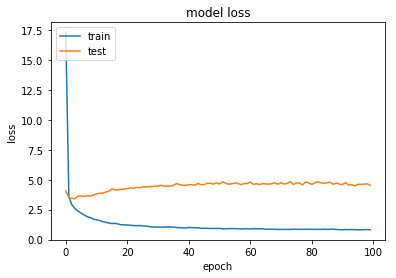

In [99]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [111]:
def mlp_model_2():
    model = Sequential()
    model.add(Dense(200, input_shape = (500,), activation = 'relu', kernel_constraint = maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(200, activation = 'relu', kernel_constraint = maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(200, activation = 'relu', kernel_constraint = maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    
    return model

In [112]:
mlp_model_2 = mlp_model_2()
history = mlp_model_2.fit(X_train, y_train, validation_split = 0.33, epochs = 10000, batch_size = 50, verbose = 1)

Train on 4019 samples, validate on 1981 samples
Epoch 1/10000
4019/4019 [==============================] - 0s - loss: 15.8385 - val_loss: 3.8951
Epoch 2/10000
4019/4019 [==============================] - 0s - loss: 3.8790 - val_loss: 3.4928
Epoch 3/10000
4019/4019 [==============================] - 0s - loss: 3.4553 - val_loss: 3.5058
Epoch 4/10000
4019/4019 [==============================] - 0s - loss: 3.1472 - val_loss: 3.5724
Epoch 5/10000
4019/4019 [==============================] - 0s - loss: 2.9222 - val_loss: 3.5081
Epoch 6/10000
4019/4019 [==============================] - 0s - loss: 2.7846 - val_loss: 3.4148
Epoch 7/10000
4019/4019 [==============================] - 0s - loss: 2.5946 - val_loss: 3.5320
Epoch 8/10000
4019/4019 [==============================] - 0s - loss: 2.5053 - val_loss: 3.5559
Epoch 9/10000
4019/4019 [==============================] - 0s - loss: 2.4857 - val_loss: 3.5218
Epoch 10/10000
4019/4019 [==============================] - 0s - loss: 2.3355 - val_los

4019/4019 [==============================] - 0s - loss: 1.2190 - val_loss: 3.8514
Epoch 86/10000
4019/4019 [==============================] - 0s - loss: 1.2174 - val_loss: 3.8824
Epoch 87/10000
4019/4019 [==============================] - 0s - loss: 1.2336 - val_loss: 3.7918
Epoch 88/10000
4019/4019 [==============================] - 0s - loss: 1.2245 - val_loss: 4.0799
Epoch 89/10000
4019/4019 [==============================] - 0s - loss: 1.2203 - val_loss: 3.8985
Epoch 90/10000
4019/4019 [==============================] - 0s - loss: 1.2056 - val_loss: 3.8329
Epoch 91/10000
4019/4019 [==============================] - 0s - loss: 1.1946 - val_loss: 3.8086
Epoch 92/10000
4019/4019 [==============================] - 0s - loss: 1.2157 - val_loss: 3.8612
Epoch 93/10000
4019/4019 [==============================] - 0s - loss: 1.1813 - val_loss: 3.8812
Epoch 94/10000
4019/4019 [==============================] - 0s - loss: 1.1827 - val_loss: 3.8183
Epoch 95/10000
4019/4019 [===================

4019/4019 [==============================] - 0s - loss: 0.9234 - val_loss: 4.0177
Epoch 252/10000
4019/4019 [==============================] - 0s - loss: 0.9242 - val_loss: 4.0504
Epoch 253/10000
4019/4019 [==============================] - 0s - loss: 0.9183 - val_loss: 3.9252
Epoch 254/10000
4019/4019 [==============================] - 0s - loss: 0.9287 - val_loss: 4.0158
Epoch 255/10000
4019/4019 [==============================] - 0s - loss: 0.8978 - val_loss: 3.9852
Epoch 256/10000
4019/4019 [==============================] - 0s - loss: 0.9143 - val_loss: 4.0289
Epoch 257/10000
4019/4019 [==============================] - 0s - loss: 0.9168 - val_loss: 4.1046
Epoch 258/10000
4019/4019 [==============================] - 0s - loss: 0.9240 - val_loss: 4.0021
Epoch 259/10000
4019/4019 [==============================] - 0s - loss: 0.9176 - val_loss: 4.0776
Epoch 260/10000
4019/4019 [==============================] - 0s - loss: 0.9167 - val_loss: 3.9792
Epoch 261/10000
4019/4019 [=========

4019/4019 [==============================] - 0s - loss: 0.8401 - val_loss: 3.8548
Epoch 418/10000
4019/4019 [==============================] - 0s - loss: 0.8671 - val_loss: 3.9153
Epoch 419/10000
4019/4019 [==============================] - 0s - loss: 0.8657 - val_loss: 4.0249
Epoch 420/10000
4019/4019 [==============================] - 0s - loss: 0.8400 - val_loss: 3.9952
Epoch 421/10000
4019/4019 [==============================] - 0s - loss: 0.8559 - val_loss: 3.9348
Epoch 422/10000
4019/4019 [==============================] - 0s - loss: 0.8438 - val_loss: 4.0082
Epoch 423/10000
4019/4019 [==============================] - 0s - loss: 0.8512 - val_loss: 3.9576
Epoch 424/10000
4019/4019 [==============================] - 0s - loss: 0.8634 - val_loss: 3.9931
Epoch 425/10000
4019/4019 [==============================] - 0s - loss: 0.8509 - val_loss: 4.0396
Epoch 426/10000
4019/4019 [==============================] - 0s - loss: 0.8543 - val_loss: 3.9542
Epoch 427/10000
4019/4019 [=========

4019/4019 [==============================] - 0s - loss: 0.8153 - val_loss: 3.8906
Epoch 584/10000
4019/4019 [==============================] - 0s - loss: 0.8327 - val_loss: 3.9090
Epoch 585/10000
4019/4019 [==============================] - 0s - loss: 0.8401 - val_loss: 4.0230
Epoch 586/10000
4019/4019 [==============================] - 0s - loss: 0.8324 - val_loss: 4.0331
Epoch 587/10000
4019/4019 [==============================] - 0s - loss: 0.8127 - val_loss: 4.0785
Epoch 588/10000
4019/4019 [==============================] - 0s - loss: 0.8041 - val_loss: 4.0767
Epoch 589/10000
4019/4019 [==============================] - 0s - loss: 0.8080 - val_loss: 3.9016
Epoch 590/10000
4019/4019 [==============================] - 0s - loss: 0.8048 - val_loss: 4.0096
Epoch 591/10000
4019/4019 [==============================] - 0s - loss: 0.8047 - val_loss: 3.9859
Epoch 592/10000
4019/4019 [==============================] - 0s - loss: 0.8035 - val_loss: 4.0487
Epoch 593/10000
4019/4019 [=========

4019/4019 [==============================] - 0s - loss: 0.8002 - val_loss: 4.0947
Epoch 750/10000
4019/4019 [==============================] - 0s - loss: 0.7757 - val_loss: 4.1226
Epoch 751/10000
4019/4019 [==============================] - 0s - loss: 0.7753 - val_loss: 4.1362
Epoch 752/10000
4019/4019 [==============================] - 0s - loss: 0.7909 - val_loss: 4.1239
Epoch 753/10000
4019/4019 [==============================] - 0s - loss: 0.7946 - val_loss: 4.0746
Epoch 754/10000
4019/4019 [==============================] - 0s - loss: 0.7933 - val_loss: 4.2253
Epoch 755/10000
4019/4019 [==============================] - 0s - loss: 0.7917 - val_loss: 4.1050
Epoch 756/10000
4019/4019 [==============================] - 0s - loss: 0.7900 - val_loss: 4.2010
Epoch 757/10000
4019/4019 [==============================] - 0s - loss: 0.7888 - val_loss: 4.0196
Epoch 758/10000
4019/4019 [==============================] - 0s - loss: 0.7959 - val_loss: 4.0572
Epoch 759/10000
4019/4019 [=========

4019/4019 [==============================] - 0s - loss: 0.7708 - val_loss: 4.0940
Epoch 916/10000
4019/4019 [==============================] - 0s - loss: 0.7906 - val_loss: 4.2831
Epoch 917/10000
4019/4019 [==============================] - 0s - loss: 0.7850 - val_loss: 4.3330
Epoch 918/10000
4019/4019 [==============================] - 0s - loss: 0.7938 - val_loss: 4.1939
Epoch 919/10000
4019/4019 [==============================] - 0s - loss: 0.7976 - val_loss: 4.1902
Epoch 920/10000
4019/4019 [==============================] - 0s - loss: 0.7847 - val_loss: 4.1769
Epoch 921/10000
4019/4019 [==============================] - 0s - loss: 0.7825 - val_loss: 4.2547
Epoch 922/10000
4019/4019 [==============================] - 0s - loss: 0.7925 - val_loss: 4.2357
Epoch 923/10000
4019/4019 [==============================] - 0s - loss: 0.7862 - val_loss: 4.1573
Epoch 924/10000
4019/4019 [==============================] - 0s - loss: 0.7750 - val_loss: 4.2595
Epoch 925/10000
4019/4019 [=========

4019/4019 [==============================] - 0s - loss: 0.7727 - val_loss: 4.1346
Epoch 1081/10000
4019/4019 [==============================] - 0s - loss: 0.7746 - val_loss: 4.1047
Epoch 1082/10000
4019/4019 [==============================] - 0s - loss: 0.7641 - val_loss: 4.1815
Epoch 1083/10000
4019/4019 [==============================] - 0s - loss: 0.7637 - val_loss: 4.1898
Epoch 1084/10000
4019/4019 [==============================] - 0s - loss: 0.7681 - val_loss: 4.2952
Epoch 1085/10000
4019/4019 [==============================] - 0s - loss: 0.7675 - val_loss: 4.0471
Epoch 1086/10000
4019/4019 [==============================] - 0s - loss: 0.7678 - val_loss: 4.0887
Epoch 1087/10000
4019/4019 [==============================] - 0s - loss: 0.7747 - val_loss: 4.1338
Epoch 1088/10000
4019/4019 [==============================] - 0s - loss: 0.7628 - val_loss: 4.2533
Epoch 1089/10000
4019/4019 [==============================] - 0s - loss: 0.7717 - val_loss: 4.1835
Epoch 1090/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7722 - val_loss: 4.2599
Epoch 1245/10000
4019/4019 [==============================] - 0s - loss: 0.7645 - val_loss: 4.2940
Epoch 1246/10000
4019/4019 [==============================] - 0s - loss: 0.7723 - val_loss: 4.1773
Epoch 1247/10000
4019/4019 [==============================] - 0s - loss: 0.7591 - val_loss: 4.4765
Epoch 1248/10000
4019/4019 [==============================] - 0s - loss: 0.7646 - val_loss: 4.3122
Epoch 1249/10000
4019/4019 [==============================] - 0s - loss: 0.7606 - val_loss: 4.2606
Epoch 1250/10000
4019/4019 [==============================] - 0s - loss: 0.7599 - val_loss: 4.2946
Epoch 1251/10000
4019/4019 [==============================] - 0s - loss: 0.7719 - val_loss: 4.1762
Epoch 1252/10000
4019/4019 [==============================] - 0s - loss: 0.7689 - val_loss: 4.2571
Epoch 1253/10000
4019/4019 [==============================] - 0s - loss: 0.7804 - val_loss: 4.2325
Epoch 1254/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7577 - val_loss: 4.1811
Epoch 1409/10000
4019/4019 [==============================] - 0s - loss: 0.7693 - val_loss: 4.1597
Epoch 1410/10000
4019/4019 [==============================] - 0s - loss: 0.7574 - val_loss: 4.2455
Epoch 1411/10000
4019/4019 [==============================] - 0s - loss: 0.7729 - val_loss: 4.2292
Epoch 1412/10000
4019/4019 [==============================] - 0s - loss: 0.7677 - val_loss: 4.2982
Epoch 1413/10000
4019/4019 [==============================] - 0s - loss: 0.7609 - val_loss: 4.2503
Epoch 1414/10000
4019/4019 [==============================] - 0s - loss: 0.7598 - val_loss: 4.1619
Epoch 1415/10000
4019/4019 [==============================] - 0s - loss: 0.7616 - val_loss: 4.3132
Epoch 1416/10000
4019/4019 [==============================] - 0s - loss: 0.7744 - val_loss: 4.1677
Epoch 1417/10000
4019/4019 [==============================] - 0s - loss: 0.7897 - val_loss: 4.3700
Epoch 1418/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7617 - val_loss: 4.1889
Epoch 1573/10000
4019/4019 [==============================] - 0s - loss: 0.7574 - val_loss: 4.1369
Epoch 1574/10000
4019/4019 [==============================] - 0s - loss: 0.7578 - val_loss: 4.3825
Epoch 1575/10000
4019/4019 [==============================] - 0s - loss: 0.7561 - val_loss: 4.2961
Epoch 1576/10000
4019/4019 [==============================] - 0s - loss: 0.7685 - val_loss: 4.2525
Epoch 1577/10000
4019/4019 [==============================] - 0s - loss: 0.7516 - val_loss: 4.3343
Epoch 1578/10000
4019/4019 [==============================] - 0s - loss: 0.7513 - val_loss: 4.3233
Epoch 1579/10000
4019/4019 [==============================] - 0s - loss: 0.7590 - val_loss: 4.1899
Epoch 1580/10000
4019/4019 [==============================] - 0s - loss: 0.7479 - val_loss: 4.2552
Epoch 1581/10000
4019/4019 [==============================] - 0s - loss: 0.7599 - val_loss: 4.2732
Epoch 1582/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7384 - val_loss: 4.2473
Epoch 1737/10000
4019/4019 [==============================] - 0s - loss: 0.7408 - val_loss: 4.3066
Epoch 1738/10000
4019/4019 [==============================] - 0s - loss: 0.7607 - val_loss: 4.3027
Epoch 1739/10000
4019/4019 [==============================] - 0s - loss: 0.7652 - val_loss: 4.4166
Epoch 1740/10000
4019/4019 [==============================] - 0s - loss: 0.7594 - val_loss: 4.3451
Epoch 1741/10000
4019/4019 [==============================] - 0s - loss: 0.7537 - val_loss: 4.4531
Epoch 1742/10000
4019/4019 [==============================] - 0s - loss: 0.7655 - val_loss: 4.1800
Epoch 1743/10000
4019/4019 [==============================] - 0s - loss: 0.7666 - val_loss: 4.3168
Epoch 1744/10000
4019/4019 [==============================] - 0s - loss: 0.7662 - val_loss: 4.3329
Epoch 1745/10000
4019/4019 [==============================] - 0s - loss: 0.7645 - val_loss: 4.5207
Epoch 1746/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7426 - val_loss: 4.2527
Epoch 1901/10000
4019/4019 [==============================] - 0s - loss: 0.7550 - val_loss: 4.3309
Epoch 1902/10000
4019/4019 [==============================] - 0s - loss: 0.7497 - val_loss: 4.2870
Epoch 1903/10000
4019/4019 [==============================] - 0s - loss: 0.7421 - val_loss: 4.3467
Epoch 1904/10000
4019/4019 [==============================] - 0s - loss: 0.7721 - val_loss: 4.2587
Epoch 1905/10000
4019/4019 [==============================] - 0s - loss: 0.7652 - val_loss: 4.3199
Epoch 1906/10000
4019/4019 [==============================] - 0s - loss: 0.7639 - val_loss: 4.3916
Epoch 1907/10000
4019/4019 [==============================] - 0s - loss: 0.7671 - val_loss: 4.3093
Epoch 1908/10000
4019/4019 [==============================] - 0s - loss: 0.7607 - val_loss: 4.3515
Epoch 1909/10000
4019/4019 [==============================] - 0s - loss: 0.7659 - val_loss: 4.2610
Epoch 1910/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7512 - val_loss: 4.5341
Epoch 2065/10000
4019/4019 [==============================] - 0s - loss: 0.7486 - val_loss: 4.3596
Epoch 2066/10000
4019/4019 [==============================] - 0s - loss: 0.7530 - val_loss: 4.4321
Epoch 2067/10000
4019/4019 [==============================] - 0s - loss: 0.7436 - val_loss: 4.4480
Epoch 2068/10000
4019/4019 [==============================] - 0s - loss: 0.7512 - val_loss: 4.3135
Epoch 2069/10000
4019/4019 [==============================] - 0s - loss: 0.7461 - val_loss: 4.3761
Epoch 2070/10000
4019/4019 [==============================] - 0s - loss: 0.7526 - val_loss: 4.5184
Epoch 2071/10000
4019/4019 [==============================] - 0s - loss: 0.7479 - val_loss: 4.4658
Epoch 2072/10000
4019/4019 [==============================] - 0s - loss: 0.7540 - val_loss: 4.3962
Epoch 2073/10000
4019/4019 [==============================] - 0s - loss: 0.7507 - val_loss: 4.3802
Epoch 2074/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7534 - val_loss: 4.3690
Epoch 2229/10000
4019/4019 [==============================] - 0s - loss: 0.7516 - val_loss: 4.4372
Epoch 2230/10000
4019/4019 [==============================] - 0s - loss: 0.7535 - val_loss: 4.2397
Epoch 2231/10000
4019/4019 [==============================] - 0s - loss: 0.7506 - val_loss: 4.4828
Epoch 2232/10000
4019/4019 [==============================] - 0s - loss: 0.7563 - val_loss: 4.3756
Epoch 2233/10000
4019/4019 [==============================] - 0s - loss: 0.7541 - val_loss: 4.3931
Epoch 2234/10000
4019/4019 [==============================] - 0s - loss: 0.7556 - val_loss: 4.3031
Epoch 2235/10000
4019/4019 [==============================] - 0s - loss: 0.7679 - val_loss: 4.3001
Epoch 2236/10000
4019/4019 [==============================] - 0s - loss: 0.7559 - val_loss: 4.3100
Epoch 2237/10000
4019/4019 [==============================] - 0s - loss: 0.7442 - val_loss: 4.3788
Epoch 2238/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7611 - val_loss: 4.3755
Epoch 2393/10000
4019/4019 [==============================] - 0s - loss: 0.7467 - val_loss: 4.4808
Epoch 2394/10000
4019/4019 [==============================] - 0s - loss: 0.7547 - val_loss: 4.3381
Epoch 2395/10000
4019/4019 [==============================] - 0s - loss: 0.7597 - val_loss: 4.3723
Epoch 2396/10000
4019/4019 [==============================] - 0s - loss: 0.7498 - val_loss: 4.4658
Epoch 2397/10000
4019/4019 [==============================] - 0s - loss: 0.7717 - val_loss: 4.4579ss: 0
Epoch 2398/10000
4019/4019 [==============================] - 0s - loss: 0.7578 - val_loss: 4.4771
Epoch 2399/10000
4019/4019 [==============================] - 0s - loss: 0.7460 - val_loss: 4.5148
Epoch 2400/10000
4019/4019 [==============================] - 0s - loss: 0.7475 - val_loss: 4.5190
Epoch 2401/10000
4019/4019 [==============================] - 0s - loss: 0.7563 - val_loss: 4.3636
Epoch 2402/10000
4019/

4019/4019 [==============================] - 0s - loss: 0.7632 - val_loss: 4.3827
Epoch 2557/10000
4019/4019 [==============================] - 0s - loss: 0.7760 - val_loss: 4.4120
Epoch 2558/10000
4019/4019 [==============================] - 0s - loss: 0.7801 - val_loss: 4.3426
Epoch 2559/10000
4019/4019 [==============================] - 0s - loss: 0.7686 - val_loss: 4.4310
Epoch 2560/10000
4019/4019 [==============================] - 0s - loss: 0.7589 - val_loss: 4.4773
Epoch 2561/10000
4019/4019 [==============================] - 0s - loss: 0.7429 - val_loss: 4.4617
Epoch 2562/10000
4019/4019 [==============================] - 0s - loss: 0.7460 - val_loss: 4.5337
Epoch 2563/10000
4019/4019 [==============================] - 0s - loss: 0.7477 - val_loss: 4.4282
Epoch 2564/10000
4019/4019 [==============================] - 0s - loss: 0.7482 - val_loss: 4.3808
Epoch 2565/10000
4019/4019 [==============================] - 0s - loss: 0.7558 - val_loss: 4.4759
Epoch 2566/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7797 - val_loss: 4.4342
Epoch 2721/10000
4019/4019 [==============================] - 0s - loss: 0.7860 - val_loss: 4.4243
Epoch 2722/10000
4019/4019 [==============================] - 0s - loss: 0.7738 - val_loss: 4.5457
Epoch 2723/10000
4019/4019 [==============================] - 0s - loss: 0.7647 - val_loss: 4.3022
Epoch 2724/10000
4019/4019 [==============================] - 0s - loss: 0.7565 - val_loss: 4.4606
Epoch 2725/10000
4019/4019 [==============================] - 0s - loss: 0.7551 - val_loss: 4.4778
Epoch 2726/10000
4019/4019 [==============================] - 0s - loss: 0.7438 - val_loss: 4.4777
Epoch 2727/10000
4019/4019 [==============================] - 0s - loss: 0.7456 - val_loss: 4.4902
Epoch 2728/10000
4019/4019 [==============================] - 0s - loss: 0.7558 - val_loss: 4.4567
Epoch 2729/10000
4019/4019 [==============================] - 0s - loss: 0.7531 - val_loss: 4.4768
Epoch 2730/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7512 - val_loss: 4.4694
Epoch 2885/10000
4019/4019 [==============================] - 0s - loss: 0.7644 - val_loss: 4.5830
Epoch 2886/10000
4019/4019 [==============================] - 0s - loss: 0.7604 - val_loss: 4.3762
Epoch 2887/10000
4019/4019 [==============================] - 0s - loss: 0.7811 - val_loss: 4.3023
Epoch 2888/10000
4019/4019 [==============================] - 0s - loss: 0.7625 - val_loss: 4.3821
Epoch 2889/10000
4019/4019 [==============================] - 0s - loss: 0.7537 - val_loss: 4.5124
Epoch 2890/10000
4019/4019 [==============================] - 0s - loss: 0.7828 - val_loss: 4.2666
Epoch 2891/10000
4019/4019 [==============================] - 0s - loss: 0.7681 - val_loss: 4.3753
Epoch 2892/10000
4019/4019 [==============================] - 0s - loss: 0.7474 - val_loss: 4.4280
Epoch 2893/10000
4019/4019 [==============================] - 0s - loss: 0.7467 - val_loss: 4.3835
Epoch 2894/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7699 - val_loss: 4.4232
Epoch 3049/10000
4019/4019 [==============================] - 0s - loss: 0.7589 - val_loss: 4.3999
Epoch 3050/10000
4019/4019 [==============================] - 0s - loss: 0.7506 - val_loss: 4.5075
Epoch 3051/10000
4019/4019 [==============================] - 0s - loss: 0.7481 - val_loss: 4.3720
Epoch 3052/10000
4019/4019 [==============================] - 0s - loss: 0.7499 - val_loss: 4.4935
Epoch 3053/10000
4019/4019 [==============================] - 0s - loss: 0.7436 - val_loss: 4.4911
Epoch 3054/10000
4019/4019 [==============================] - 0s - loss: 0.7432 - val_loss: 4.4979
Epoch 3055/10000
4019/4019 [==============================] - 0s - loss: 0.7415 - val_loss: 4.4095
Epoch 3056/10000
4019/4019 [==============================] - 0s - loss: 0.7451 - val_loss: 4.3809
Epoch 3057/10000
4019/4019 [==============================] - 0s - loss: 0.7550 - val_loss: 4.4402
Epoch 3058/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7488 - val_loss: 4.4803
Epoch 3213/10000
4019/4019 [==============================] - 0s - loss: 0.7686 - val_loss: 4.3908
Epoch 3214/10000
4019/4019 [==============================] - 0s - loss: 0.7500 - val_loss: 4.4366
Epoch 3215/10000
4019/4019 [==============================] - 0s - loss: 0.7518 - val_loss: 4.3080
Epoch 3216/10000
4019/4019 [==============================] - 0s - loss: 0.7458 - val_loss: 4.2993
Epoch 3217/10000
4019/4019 [==============================] - 0s - loss: 0.7444 - val_loss: 4.4341
Epoch 3218/10000
4019/4019 [==============================] - 0s - loss: 0.7383 - val_loss: 4.3983
Epoch 3219/10000
4019/4019 [==============================] - 0s - loss: 0.7400 - val_loss: 4.3692
Epoch 3220/10000
4019/4019 [==============================] - 0s - loss: 0.7390 - val_loss: 4.4255
Epoch 3221/10000
4019/4019 [==============================] - 0s - loss: 0.7411 - val_loss: 4.5031
Epoch 3222/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7465 - val_loss: 4.4222
Epoch 3377/10000
4019/4019 [==============================] - 0s - loss: 0.7609 - val_loss: 4.5331
Epoch 3378/10000
4019/4019 [==============================] - 0s - loss: 0.7444 - val_loss: 4.4200
Epoch 3379/10000
4019/4019 [==============================] - 0s - loss: 0.7417 - val_loss: 4.4274
Epoch 3380/10000
4019/4019 [==============================] - 0s - loss: 0.7453 - val_loss: 4.3408
Epoch 3381/10000
4019/4019 [==============================] - 0s - loss: 0.7381 - val_loss: 4.5104
Epoch 3382/10000
4019/4019 [==============================] - 0s - loss: 0.7456 - val_loss: 4.5168
Epoch 3383/10000
4019/4019 [==============================] - 0s - loss: 0.7518 - val_loss: 4.5214
Epoch 3384/10000
4019/4019 [==============================] - 0s - loss: 0.7369 - val_loss: 4.5563
Epoch 3385/10000
4019/4019 [==============================] - 0s - loss: 0.7532 - val_loss: 4.4440
Epoch 3386/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7413 - val_loss: 4.5465
Epoch 3541/10000
4019/4019 [==============================] - 0s - loss: 0.7406 - val_loss: 4.4237
Epoch 3542/10000
4019/4019 [==============================] - 0s - loss: 0.7469 - val_loss: 4.4226
Epoch 3543/10000
4019/4019 [==============================] - 0s - loss: 0.7477 - val_loss: 4.6077
Epoch 3544/10000
4019/4019 [==============================] - 0s - loss: 0.7438 - val_loss: 4.4923
Epoch 3545/10000
4019/4019 [==============================] - 0s - loss: 0.7498 - val_loss: 4.5127
Epoch 3546/10000
4019/4019 [==============================] - 0s - loss: 0.7629 - val_loss: 4.4235
Epoch 3547/10000
4019/4019 [==============================] - 0s - loss: 0.7624 - val_loss: 4.5330
Epoch 3548/10000
4019/4019 [==============================] - 0s - loss: 0.7554 - val_loss: 4.4229
Epoch 3549/10000
4019/4019 [==============================] - 0s - loss: 0.7568 - val_loss: 4.4836
Epoch 3550/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7544 - val_loss: 4.4268
Epoch 3705/10000
4019/4019 [==============================] - 0s - loss: 0.7597 - val_loss: 4.4677
Epoch 3706/10000
4019/4019 [==============================] - 0s - loss: 0.7536 - val_loss: 4.5441
Epoch 3707/10000
4019/4019 [==============================] - 0s - loss: 0.7539 - val_loss: 4.5485
Epoch 3708/10000
4019/4019 [==============================] - 0s - loss: 0.7539 - val_loss: 4.4832
Epoch 3709/10000
4019/4019 [==============================] - 0s - loss: 0.7540 - val_loss: 4.4134
Epoch 3710/10000
4019/4019 [==============================] - 0s - loss: 0.7550 - val_loss: 4.5462
Epoch 3711/10000
4019/4019 [==============================] - 0s - loss: 0.7579 - val_loss: 4.4028
Epoch 3712/10000
4019/4019 [==============================] - 0s - loss: 0.7441 - val_loss: 4.4093
Epoch 3713/10000
4019/4019 [==============================] - 0s - loss: 0.7420 - val_loss: 4.4505
Epoch 3714/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7414 - val_loss: 4.5725
Epoch 3869/10000
4019/4019 [==============================] - 0s - loss: 0.7451 - val_loss: 4.6093
Epoch 3870/10000
4019/4019 [==============================] - 0s - loss: 0.7444 - val_loss: 4.4301
Epoch 3871/10000
4019/4019 [==============================] - 0s - loss: 0.7604 - val_loss: 4.4486
Epoch 3872/10000
4019/4019 [==============================] - 0s - loss: 0.7541 - val_loss: 4.4186
Epoch 3873/10000
4019/4019 [==============================] - 0s - loss: 0.7541 - val_loss: 4.4862
Epoch 3874/10000
4019/4019 [==============================] - 0s - loss: 0.7509 - val_loss: 4.4398
Epoch 3875/10000
4019/4019 [==============================] - 0s - loss: 0.7496 - val_loss: 4.3860
Epoch 3876/10000
4019/4019 [==============================] - 0s - loss: 0.7419 - val_loss: 4.5319
Epoch 3877/10000
4019/4019 [==============================] - 0s - loss: 0.7450 - val_loss: 4.5344
Epoch 3878/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7586 - val_loss: 4.4795
Epoch 4033/10000
4019/4019 [==============================] - 0s - loss: 0.7507 - val_loss: 4.4458
Epoch 4034/10000
4019/4019 [==============================] - 0s - loss: 0.7415 - val_loss: 4.3883
Epoch 4035/10000
4019/4019 [==============================] - 0s - loss: 0.7430 - val_loss: 4.4388
Epoch 4036/10000
4019/4019 [==============================] - 0s - loss: 0.7363 - val_loss: 4.4991
Epoch 4037/10000
4019/4019 [==============================] - 0s - loss: 0.7390 - val_loss: 4.4372
Epoch 4038/10000
4019/4019 [==============================] - 0s - loss: 0.7447 - val_loss: 4.4255
Epoch 4039/10000
4019/4019 [==============================] - 0s - loss: 0.7441 - val_loss: 4.5219
Epoch 4040/10000
4019/4019 [==============================] - 0s - loss: 0.7402 - val_loss: 4.4826
Epoch 4041/10000
4019/4019 [==============================] - 0s - loss: 0.7392 - val_loss: 4.5155
Epoch 4042/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7445 - val_loss: 4.4905
Epoch 4197/10000
4019/4019 [==============================] - 0s - loss: 0.7426 - val_loss: 4.5947
Epoch 4198/10000
4019/4019 [==============================] - 0s - loss: 0.7418 - val_loss: 4.4108
Epoch 4199/10000
4019/4019 [==============================] - 0s - loss: 0.7414 - val_loss: 4.5467
Epoch 4200/10000
4019/4019 [==============================] - 0s - loss: 0.7613 - val_loss: 4.5046
Epoch 4201/10000
4019/4019 [==============================] - 0s - loss: 0.7435 - val_loss: 4.5785
Epoch 4202/10000
4019/4019 [==============================] - 0s - loss: 0.7413 - val_loss: 4.4437
Epoch 4203/10000
4019/4019 [==============================] - 0s - loss: 0.7460 - val_loss: 4.4413
Epoch 4204/10000
4019/4019 [==============================] - 0s - loss: 0.7529 - val_loss: 4.4403
Epoch 4205/10000
4019/4019 [==============================] - 0s - loss: 0.7486 - val_loss: 4.5363
Epoch 4206/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7434 - val_loss: 4.5840
Epoch 4361/10000
4019/4019 [==============================] - 0s - loss: 0.7358 - val_loss: 4.7383
Epoch 4362/10000
4019/4019 [==============================] - 0s - loss: 0.7536 - val_loss: 4.5312
Epoch 4363/10000
4019/4019 [==============================] - 0s - loss: 0.7514 - val_loss: 4.5537
Epoch 4364/10000
4019/4019 [==============================] - 0s - loss: 0.7483 - val_loss: 4.5393
Epoch 4365/10000
4019/4019 [==============================] - 0s - loss: 0.7459 - val_loss: 4.6054
Epoch 4366/10000
4019/4019 [==============================] - 0s - loss: 0.7450 - val_loss: 4.5022
Epoch 4367/10000
4019/4019 [==============================] - 0s - loss: 0.7550 - val_loss: 4.5643
Epoch 4368/10000
4019/4019 [==============================] - 0s - loss: 0.7625 - val_loss: 4.5279
Epoch 4369/10000
4019/4019 [==============================] - 0s - loss: 0.7467 - val_loss: 4.6091
Epoch 4370/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7547 - val_loss: 4.4931
Epoch 4525/10000
4019/4019 [==============================] - 0s - loss: 0.7496 - val_loss: 4.5161
Epoch 4526/10000
4019/4019 [==============================] - 0s - loss: 0.7497 - val_loss: 4.6454
Epoch 4527/10000
4019/4019 [==============================] - 0s - loss: 0.7444 - val_loss: 4.6020
Epoch 4528/10000
4019/4019 [==============================] - 0s - loss: 0.7336 - val_loss: 4.6089
Epoch 4529/10000
4019/4019 [==============================] - 0s - loss: 0.7444 - val_loss: 4.5736
Epoch 4530/10000
4019/4019 [==============================] - 0s - loss: 0.7388 - val_loss: 4.6508
Epoch 4531/10000
4019/4019 [==============================] - 0s - loss: 0.7414 - val_loss: 4.6163
Epoch 4532/10000
4019/4019 [==============================] - 0s - loss: 0.7414 - val_loss: 4.5663
Epoch 4533/10000
4019/4019 [==============================] - 0s - loss: 0.7374 - val_loss: 4.6695
Epoch 4534/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7527 - val_loss: 4.5654
Epoch 4689/10000
4019/4019 [==============================] - 0s - loss: 0.7507 - val_loss: 4.5046
Epoch 4690/10000
4019/4019 [==============================] - 0s - loss: 0.7501 - val_loss: 4.5214
Epoch 4691/10000
4019/4019 [==============================] - 0s - loss: 0.7441 - val_loss: 4.4387
Epoch 4692/10000
4019/4019 [==============================] - 0s - loss: 0.7484 - val_loss: 4.5254
Epoch 4693/10000
4019/4019 [==============================] - 0s - loss: 0.7396 - val_loss: 4.5801
Epoch 4694/10000
4019/4019 [==============================] - 0s - loss: 0.7458 - val_loss: 4.3882
Epoch 4695/10000
4019/4019 [==============================] - 0s - loss: 0.7507 - val_loss: 4.5503
Epoch 4696/10000
4019/4019 [==============================] - 0s - loss: 0.7460 - val_loss: 4.5258
Epoch 4697/10000
4019/4019 [==============================] - 0s - loss: 0.7456 - val_loss: 4.5146
Epoch 4698/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7333 - val_loss: 4.6080
Epoch 4853/10000
4019/4019 [==============================] - 0s - loss: 0.7415 - val_loss: 4.5023
Epoch 4854/10000
4019/4019 [==============================] - 0s - loss: 0.7375 - val_loss: 4.5453
Epoch 4855/10000
4019/4019 [==============================] - 0s - loss: 0.7558 - val_loss: 4.5322
Epoch 4856/10000
4019/4019 [==============================] - 0s - loss: 0.7376 - val_loss: 4.4721
Epoch 4857/10000
4019/4019 [==============================] - 0s - loss: 0.7399 - val_loss: 4.4918
Epoch 4858/10000
4019/4019 [==============================] - 0s - loss: 0.7489 - val_loss: 4.4757
Epoch 4859/10000
4019/4019 [==============================] - 0s - loss: 0.7597 - val_loss: 4.4847
Epoch 4860/10000
4019/4019 [==============================] - 0s - loss: 0.7558 - val_loss: 4.4003
Epoch 4861/10000
4019/4019 [==============================] - 0s - loss: 0.7670 - val_loss: 4.4336
Epoch 4862/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7568 - val_loss: 4.4866
Epoch 5017/10000
4019/4019 [==============================] - 0s - loss: 0.7485 - val_loss: 4.5485
Epoch 5018/10000
4019/4019 [==============================] - 0s - loss: 0.7506 - val_loss: 4.5758
Epoch 5019/10000
4019/4019 [==============================] - 0s - loss: 0.7531 - val_loss: 4.6040
Epoch 5020/10000
4019/4019 [==============================] - 0s - loss: 0.7682 - val_loss: 4.5317
Epoch 5021/10000
4019/4019 [==============================] - 0s - loss: 0.7572 - val_loss: 4.5008
Epoch 5022/10000
4019/4019 [==============================] - 0s - loss: 0.7575 - val_loss: 4.4681
Epoch 5023/10000
4019/4019 [==============================] - 0s - loss: 0.7609 - val_loss: 4.5669
Epoch 5024/10000
4019/4019 [==============================] - 0s - loss: 0.7568 - val_loss: 4.4239
Epoch 5025/10000
4019/4019 [==============================] - 0s - loss: 0.7546 - val_loss: 4.4602
Epoch 5026/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7592 - val_loss: 4.4742
Epoch 5181/10000
4019/4019 [==============================] - 0s - loss: 0.7534 - val_loss: 4.4876
Epoch 5182/10000
4019/4019 [==============================] - 0s - loss: 0.7497 - val_loss: 4.4712
Epoch 5183/10000
4019/4019 [==============================] - 0s - loss: 0.7499 - val_loss: 4.4436
Epoch 5184/10000
4019/4019 [==============================] - 0s - loss: 0.7384 - val_loss: 4.6664
Epoch 5185/10000
4019/4019 [==============================] - 0s - loss: 0.7327 - val_loss: 4.6279
Epoch 5186/10000
4019/4019 [==============================] - 0s - loss: 0.7357 - val_loss: 4.6918
Epoch 5187/10000
4019/4019 [==============================] - 0s - loss: 0.7425 - val_loss: 4.5986
Epoch 5188/10000
4019/4019 [==============================] - 0s - loss: 0.7552 - val_loss: 4.5534
Epoch 5189/10000
4019/4019 [==============================] - 0s - loss: 0.7536 - val_loss: 4.4973
Epoch 5190/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7492 - val_loss: 4.5676
Epoch 5345/10000
4019/4019 [==============================] - 0s - loss: 0.7504 - val_loss: 4.6498
Epoch 5346/10000
4019/4019 [==============================] - 0s - loss: 0.7615 - val_loss: 4.5736
Epoch 5347/10000
4019/4019 [==============================] - 0s - loss: 0.7685 - val_loss: 4.5180
Epoch 5348/10000
4019/4019 [==============================] - 0s - loss: 0.7430 - val_loss: 4.5954
Epoch 5349/10000
4019/4019 [==============================] - 0s - loss: 0.7479 - val_loss: 4.5977
Epoch 5350/10000
4019/4019 [==============================] - 0s - loss: 0.7546 - val_loss: 4.6759
Epoch 5351/10000
4019/4019 [==============================] - 0s - loss: 0.7528 - val_loss: 4.5481
Epoch 5352/10000
4019/4019 [==============================] - 0s - loss: 0.7528 - val_loss: 4.6093
Epoch 5353/10000
4019/4019 [==============================] - 0s - loss: 0.7421 - val_loss: 4.6918
Epoch 5354/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7436 - val_loss: 4.5480
Epoch 5509/10000
4019/4019 [==============================] - 0s - loss: 0.7446 - val_loss: 4.5551
Epoch 5510/10000
4019/4019 [==============================] - 0s - loss: 0.7485 - val_loss: 4.6381
Epoch 5511/10000
4019/4019 [==============================] - 0s - loss: 0.7387 - val_loss: 4.5864
Epoch 5512/10000
4019/4019 [==============================] - 0s - loss: 0.7444 - val_loss: 4.6162
Epoch 5513/10000
4019/4019 [==============================] - 0s - loss: 0.7437 - val_loss: 4.5437
Epoch 5514/10000
4019/4019 [==============================] - 0s - loss: 0.7404 - val_loss: 4.6145
Epoch 5515/10000
4019/4019 [==============================] - 0s - loss: 0.7547 - val_loss: 4.5673
Epoch 5516/10000
4019/4019 [==============================] - 0s - loss: 0.7516 - val_loss: 4.3559
Epoch 5517/10000
4019/4019 [==============================] - 0s - loss: 0.7572 - val_loss: 4.4710
Epoch 5518/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7561 - val_loss: 4.6494
Epoch 5673/10000
4019/4019 [==============================] - 0s - loss: 0.7377 - val_loss: 4.5620
Epoch 5674/10000
4019/4019 [==============================] - 0s - loss: 0.7363 - val_loss: 4.5700
Epoch 5675/10000
4019/4019 [==============================] - 0s - loss: 0.7375 - val_loss: 4.6671
Epoch 5676/10000
4019/4019 [==============================] - 0s - loss: 0.7452 - val_loss: 4.5239
Epoch 5677/10000
4019/4019 [==============================] - 0s - loss: 0.7406 - val_loss: 4.4995
Epoch 5678/10000
4019/4019 [==============================] - 0s - loss: 0.7472 - val_loss: 4.5138
Epoch 5679/10000
4019/4019 [==============================] - 0s - loss: 0.7436 - val_loss: 4.6660
Epoch 5680/10000
4019/4019 [==============================] - 0s - loss: 0.7389 - val_loss: 4.5697
Epoch 5681/10000
4019/4019 [==============================] - 0s - loss: 0.7415 - val_loss: 4.5854
Epoch 5682/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7426 - val_loss: 4.7047
Epoch 5837/10000
4019/4019 [==============================] - ETA: 0s - loss: 0.720 - 0s - loss: 0.7459 - val_loss: 4.6417
Epoch 5838/10000
4019/4019 [==============================] - 0s - loss: 0.7434 - val_loss: 4.6092
Epoch 5839/10000
4019/4019 [==============================] - 0s - loss: 0.7422 - val_loss: 4.6563
Epoch 5840/10000
4019/4019 [==============================] - 0s - loss: 0.7450 - val_loss: 4.6622
Epoch 5841/10000
4019/4019 [==============================] - 0s - loss: 0.7344 - val_loss: 4.5900
Epoch 5842/10000
4019/4019 [==============================] - 0s - loss: 0.7461 - val_loss: 4.6586
Epoch 5843/10000
4019/4019 [==============================] - 0s - loss: 0.7451 - val_loss: 4.6106
Epoch 5844/10000
4019/4019 [==============================] - 0s - loss: 0.7451 - val_loss: 4.4096
Epoch 5845/10000
4019/4019 [==============================] - 0s - loss: 0.7416 - val_loss: 4.5878
Epo

4019/4019 [==============================] - 0s - loss: 0.7426 - val_loss: 4.5500
Epoch 6001/10000
4019/4019 [==============================] - 0s - loss: 0.7501 - val_loss: 4.6984
Epoch 6002/10000
4019/4019 [==============================] - 0s - loss: 0.7503 - val_loss: 4.6227
Epoch 6003/10000
4019/4019 [==============================] - 0s - loss: 0.7539 - val_loss: 4.6226
Epoch 6004/10000
4019/4019 [==============================] - 0s - loss: 0.7390 - val_loss: 4.6723
Epoch 6005/10000
4019/4019 [==============================] - 0s - loss: 0.7398 - val_loss: 4.7371
Epoch 6006/10000
4019/4019 [==============================] - 0s - loss: 0.7414 - val_loss: 4.6866
Epoch 6007/10000
4019/4019 [==============================] - 0s - loss: 0.7377 - val_loss: 4.6107
Epoch 6008/10000
4019/4019 [==============================] - 0s - loss: 0.7538 - val_loss: 4.5603
Epoch 6009/10000
4019/4019 [==============================] - 0s - loss: 0.7447 - val_loss: 4.5549
Epoch 6010/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7347 - val_loss: 4.5359
Epoch 6165/10000
4019/4019 [==============================] - 0s - loss: 0.7421 - val_loss: 4.6110
Epoch 6166/10000
4019/4019 [==============================] - 0s - loss: 0.7355 - val_loss: 4.6261
Epoch 6167/10000
4019/4019 [==============================] - 0s - loss: 0.7460 - val_loss: 4.6286
Epoch 6168/10000
4019/4019 [==============================] - 0s - loss: 0.7481 - val_loss: 4.7213
Epoch 6169/10000
4019/4019 [==============================] - 0s - loss: 0.7396 - val_loss: 4.6477
Epoch 6170/10000
4019/4019 [==============================] - 0s - loss: 0.7397 - val_loss: 4.6532
Epoch 6171/10000
4019/4019 [==============================] - 0s - loss: 0.7432 - val_loss: 4.6923
Epoch 6172/10000
4019/4019 [==============================] - 0s - loss: 0.7358 - val_loss: 4.5049
Epoch 6173/10000
4019/4019 [==============================] - 0s - loss: 0.7579 - val_loss: 4.5637
Epoch 6174/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7629 - val_loss: 4.7177
Epoch 6329/10000
4019/4019 [==============================] - 0s - loss: 0.7573 - val_loss: 4.7132
Epoch 6330/10000
4019/4019 [==============================] - 0s - loss: 0.7770 - val_loss: 4.7200
Epoch 6331/10000
4019/4019 [==============================] - 0s - loss: 0.7702 - val_loss: 4.6151
Epoch 6332/10000
4019/4019 [==============================] - 0s - loss: 0.7472 - val_loss: 4.6415
Epoch 6333/10000
4019/4019 [==============================] - 0s - loss: 0.7460 - val_loss: 4.6566
Epoch 6334/10000
4019/4019 [==============================] - 0s - loss: 0.7570 - val_loss: 4.6523
Epoch 6335/10000
4019/4019 [==============================] - 0s - loss: 0.7538 - val_loss: 4.6736
Epoch 6336/10000
4019/4019 [==============================] - 0s - loss: 0.7465 - val_loss: 4.7501
Epoch 6337/10000
4019/4019 [==============================] - 0s - loss: 0.7382 - val_loss: 4.6377
Epoch 6338/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7500 - val_loss: 4.5307
Epoch 6493/10000
4019/4019 [==============================] - 0s - loss: 0.7623 - val_loss: 4.6466
Epoch 6494/10000
4019/4019 [==============================] - 0s - loss: 0.7518 - val_loss: 4.6328
Epoch 6495/10000
4019/4019 [==============================] - 0s - loss: 0.7477 - val_loss: 4.4959
Epoch 6496/10000
4019/4019 [==============================] - 0s - loss: 0.7451 - val_loss: 4.4916
Epoch 6497/10000
4019/4019 [==============================] - 0s - loss: 0.7357 - val_loss: 4.6020
Epoch 6498/10000
4019/4019 [==============================] - 0s - loss: 0.7401 - val_loss: 4.6393
Epoch 6499/10000
4019/4019 [==============================] - 0s - loss: 0.7424 - val_loss: 4.6079
Epoch 6500/10000
4019/4019 [==============================] - 0s - loss: 0.7383 - val_loss: 4.5591
Epoch 6501/10000
4019/4019 [==============================] - 0s - loss: 0.7381 - val_loss: 4.3722
Epoch 6502/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7718 - val_loss: 4.5724
Epoch 6657/10000
4019/4019 [==============================] - 0s - loss: 0.7462 - val_loss: 4.5561
Epoch 6658/10000
4019/4019 [==============================] - 0s - loss: 0.7415 - val_loss: 4.5329
Epoch 6659/10000
4019/4019 [==============================] - 0s - loss: 0.7461 - val_loss: 4.5470
Epoch 6660/10000
4019/4019 [==============================] - 0s - loss: 0.7400 - val_loss: 4.5292
Epoch 6661/10000
4019/4019 [==============================] - 0s - loss: 0.7455 - val_loss: 4.6105
Epoch 6662/10000
4019/4019 [==============================] - 0s - loss: 0.7686 - val_loss: 4.6039
Epoch 6663/10000
4019/4019 [==============================] - 0s - loss: 0.7529 - val_loss: 4.5072
Epoch 6664/10000
4019/4019 [==============================] - 0s - loss: 0.7548 - val_loss: 4.4830
Epoch 6665/10000
4019/4019 [==============================] - 0s - loss: 0.7415 - val_loss: 4.4911
Epoch 6666/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7576 - val_loss: 4.6094
Epoch 6821/10000
4019/4019 [==============================] - 0s - loss: 0.7530 - val_loss: 4.6872
Epoch 6822/10000
4019/4019 [==============================] - 0s - loss: 0.7425 - val_loss: 4.5824
Epoch 6823/10000
4019/4019 [==============================] - 0s - loss: 0.7490 - val_loss: 4.5908
Epoch 6824/10000
4019/4019 [==============================] - 0s - loss: 0.7490 - val_loss: 4.5978
Epoch 6825/10000
4019/4019 [==============================] - 0s - loss: 0.7386 - val_loss: 4.6654
Epoch 6826/10000
4019/4019 [==============================] - 0s - loss: 0.7483 - val_loss: 4.6369
Epoch 6827/10000
4019/4019 [==============================] - 0s - loss: 0.7542 - val_loss: 4.5850
Epoch 6828/10000
4019/4019 [==============================] - 0s - loss: 0.7474 - val_loss: 4.6324
Epoch 6829/10000
4019/4019 [==============================] - 0s - loss: 0.7478 - val_loss: 4.5935
Epoch 6830/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7363 - val_loss: 4.5813
Epoch 6985/10000
4019/4019 [==============================] - 0s - loss: 0.7505 - val_loss: 4.6390
Epoch 6986/10000
4019/4019 [==============================] - 0s - loss: 0.7413 - val_loss: 4.5475
Epoch 6987/10000
4019/4019 [==============================] - 0s - loss: 0.7464 - val_loss: 4.5857
Epoch 6988/10000
4019/4019 [==============================] - 0s - loss: 0.7524 - val_loss: 4.5472
Epoch 6989/10000
4019/4019 [==============================] - 0s - loss: 0.7846 - val_loss: 4.4459
Epoch 6990/10000
4019/4019 [==============================] - 0s - loss: 0.7779 - val_loss: 4.4435
Epoch 6991/10000
4019/4019 [==============================] - 0s - loss: 0.7497 - val_loss: 4.3790
Epoch 6992/10000
4019/4019 [==============================] - 0s - loss: 0.7492 - val_loss: 4.5404
Epoch 6993/10000
4019/4019 [==============================] - 0s - loss: 0.7395 - val_loss: 4.5924
Epoch 6994/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7511 - val_loss: 4.5434
Epoch 7149/10000
4019/4019 [==============================] - 0s - loss: 0.7488 - val_loss: 4.4427
Epoch 7150/10000
4019/4019 [==============================] - 0s - loss: 0.7473 - val_loss: 4.5770
Epoch 7151/10000
4019/4019 [==============================] - 0s - loss: 0.7504 - val_loss: 4.3876
Epoch 7152/10000
4019/4019 [==============================] - 0s - loss: 0.7483 - val_loss: 4.4051
Epoch 7153/10000
4019/4019 [==============================] - 0s - loss: 0.7471 - val_loss: 4.4776
Epoch 7154/10000
4019/4019 [==============================] - 0s - loss: 0.7551 - val_loss: 4.5793
Epoch 7155/10000
4019/4019 [==============================] - 0s - loss: 0.7396 - val_loss: 4.6822
Epoch 7156/10000
4019/4019 [==============================] - 0s - loss: 0.7501 - val_loss: 4.4356
Epoch 7157/10000
4019/4019 [==============================] - 0s - loss: 0.7433 - val_loss: 4.6234
Epoch 7158/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7471 - val_loss: 4.6175
Epoch 7313/10000
4019/4019 [==============================] - 0s - loss: 0.7387 - val_loss: 4.5460
Epoch 7314/10000
4019/4019 [==============================] - 0s - loss: 0.7473 - val_loss: 4.4329
Epoch 7315/10000
4019/4019 [==============================] - 0s - loss: 0.7491 - val_loss: 4.5210
Epoch 7316/10000
4019/4019 [==============================] - 0s - loss: 0.7456 - val_loss: 4.5882
Epoch 7317/10000
4019/4019 [==============================] - 0s - loss: 0.7480 - val_loss: 4.5536
Epoch 7318/10000
4019/4019 [==============================] - 0s - loss: 0.7404 - val_loss: 4.5608
Epoch 7319/10000
4019/4019 [==============================] - 0s - loss: 0.7379 - val_loss: 4.6243
Epoch 7320/10000
4019/4019 [==============================] - 0s - loss: 0.7497 - val_loss: 4.5328
Epoch 7321/10000
4019/4019 [==============================] - 0s - loss: 0.7479 - val_loss: 4.6196
Epoch 7322/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7474 - val_loss: 4.5187
Epoch 7477/10000
4019/4019 [==============================] - 0s - loss: 0.7448 - val_loss: 4.4811
Epoch 7478/10000
4019/4019 [==============================] - 0s - loss: 0.7396 - val_loss: 4.5154
Epoch 7479/10000
4019/4019 [==============================] - 0s - loss: 0.7462 - val_loss: 4.4531
Epoch 7480/10000
4019/4019 [==============================] - 0s - loss: 0.7633 - val_loss: 4.5480
Epoch 7481/10000
4019/4019 [==============================] - 0s - loss: 0.7521 - val_loss: 4.4417
Epoch 7482/10000
4019/4019 [==============================] - 0s - loss: 0.7536 - val_loss: 4.4799
Epoch 7483/10000
4019/4019 [==============================] - 0s - loss: 0.7512 - val_loss: 4.4036
Epoch 7484/10000
4019/4019 [==============================] - 0s - loss: 0.7730 - val_loss: 4.5263
Epoch 7485/10000
4019/4019 [==============================] - 0s - loss: 0.7555 - val_loss: 4.5151
Epoch 7486/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7465 - val_loss: 4.4689
Epoch 7641/10000
4019/4019 [==============================] - 0s - loss: 0.7519 - val_loss: 4.4836
Epoch 7642/10000
4019/4019 [==============================] - 0s - loss: 0.7509 - val_loss: 4.5168
Epoch 7643/10000
4019/4019 [==============================] - 0s - loss: 0.7680 - val_loss: 4.4552
Epoch 7644/10000
4019/4019 [==============================] - 0s - loss: 0.7666 - val_loss: 4.5242
Epoch 7645/10000
4019/4019 [==============================] - 0s - loss: 0.7660 - val_loss: 4.4642
Epoch 7646/10000
4019/4019 [==============================] - 0s - loss: 0.7669 - val_loss: 4.5744
Epoch 7647/10000
4019/4019 [==============================] - 0s - loss: 0.7667 - val_loss: 4.6484
Epoch 7648/10000
4019/4019 [==============================] - 0s - loss: 0.7682 - val_loss: 4.5467
Epoch 7649/10000
4019/4019 [==============================] - 0s - loss: 0.7590 - val_loss: 4.6860
Epoch 7650/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7405 - val_loss: 4.5948
Epoch 7805/10000
4019/4019 [==============================] - 0s - loss: 0.7395 - val_loss: 4.4089
Epoch 7806/10000
4019/4019 [==============================] - 0s - loss: 0.7375 - val_loss: 4.4816
Epoch 7807/10000
4019/4019 [==============================] - 0s - loss: 0.7442 - val_loss: 4.5709
Epoch 7808/10000
4019/4019 [==============================] - 0s - loss: 0.7411 - val_loss: 4.5259
Epoch 7809/10000
4019/4019 [==============================] - 0s - loss: 0.7362 - val_loss: 4.5530
Epoch 7810/10000
4019/4019 [==============================] - 0s - loss: 0.7347 - val_loss: 4.5574
Epoch 7811/10000
4019/4019 [==============================] - 0s - loss: 0.7287 - val_loss: 4.5873
Epoch 7812/10000
4019/4019 [==============================] - 0s - loss: 0.7361 - val_loss: 4.6855
Epoch 7813/10000
4019/4019 [==============================] - 0s - loss: 0.7425 - val_loss: 4.5291
Epoch 7814/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7436 - val_loss: 4.5993
Epoch 7969/10000
4019/4019 [==============================] - 0s - loss: 0.7405 - val_loss: 4.6619
Epoch 7970/10000
4019/4019 [==============================] - 0s - loss: 0.7324 - val_loss: 4.7456
Epoch 7971/10000
4019/4019 [==============================] - 0s - loss: 0.7399 - val_loss: 4.6338
Epoch 7972/10000
4019/4019 [==============================] - 0s - loss: 0.7386 - val_loss: 4.5816
Epoch 7973/10000
4019/4019 [==============================] - 0s - loss: 0.7714 - val_loss: 4.6419
Epoch 7974/10000
4019/4019 [==============================] - 0s - loss: 0.7557 - val_loss: 4.7559
Epoch 7975/10000
4019/4019 [==============================] - 0s - loss: 0.7518 - val_loss: 4.4811
Epoch 7976/10000
4019/4019 [==============================] - 0s - loss: 0.7732 - val_loss: 4.6518
Epoch 7977/10000
4019/4019 [==============================] - 0s - loss: 0.7571 - val_loss: 4.5834
Epoch 7978/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7545 - val_loss: 4.5917
Epoch 8133/10000
4019/4019 [==============================] - 0s - loss: 0.7531 - val_loss: 4.6635
Epoch 8134/10000
4019/4019 [==============================] - 0s - loss: 0.7720 - val_loss: 4.5743
Epoch 8135/10000
4019/4019 [==============================] - 0s - loss: 0.7521 - val_loss: 4.5542
Epoch 8136/10000
4019/4019 [==============================] - 0s - loss: 0.7531 - val_loss: 4.6009
Epoch 8137/10000
4019/4019 [==============================] - 0s - loss: 0.7451 - val_loss: 4.5758
Epoch 8138/10000
4019/4019 [==============================] - 0s - loss: 0.7443 - val_loss: 4.6718
Epoch 8139/10000
4019/4019 [==============================] - 0s - loss: 0.7387 - val_loss: 4.5876
Epoch 8140/10000
4019/4019 [==============================] - 0s - loss: 0.7437 - val_loss: 4.5621
Epoch 8141/10000
4019/4019 [==============================] - 0s - loss: 0.7379 - val_loss: 4.6253
Epoch 8142/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7438 - val_loss: 4.5853
Epoch 8297/10000
4019/4019 [==============================] - 0s - loss: 0.7486 - val_loss: 4.5243
Epoch 8298/10000
4019/4019 [==============================] - 0s - loss: 0.7329 - val_loss: 4.5871
Epoch 8299/10000
4019/4019 [==============================] - 0s - loss: 0.7391 - val_loss: 4.4920
Epoch 8300/10000
4019/4019 [==============================] - 0s - loss: 0.7431 - val_loss: 4.5988
Epoch 8301/10000
4019/4019 [==============================] - 0s - loss: 0.7450 - val_loss: 4.4339
Epoch 8302/10000
4019/4019 [==============================] - 0s - loss: 0.7389 - val_loss: 4.5151
Epoch 8303/10000
4019/4019 [==============================] - 0s - loss: 0.7596 - val_loss: 4.5160
Epoch 8304/10000
4019/4019 [==============================] - 0s - loss: 0.7504 - val_loss: 4.3464
Epoch 8305/10000
4019/4019 [==============================] - 0s - loss: 0.7609 - val_loss: 4.4673
Epoch 8306/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7495 - val_loss: 4.4220
Epoch 8461/10000
4019/4019 [==============================] - 0s - loss: 0.7558 - val_loss: 4.5454
Epoch 8462/10000
4019/4019 [==============================] - 0s - loss: 0.7546 - val_loss: 4.5363
Epoch 8463/10000
4019/4019 [==============================] - 0s - loss: 0.7583 - val_loss: 4.4457
Epoch 8464/10000
4019/4019 [==============================] - 0s - loss: 0.7434 - val_loss: 4.4986
Epoch 8465/10000
4019/4019 [==============================] - 0s - loss: 0.7448 - val_loss: 4.5208
Epoch 8466/10000
4019/4019 [==============================] - 0s - loss: 0.7421 - val_loss: 4.6118
Epoch 8467/10000
4019/4019 [==============================] - 0s - loss: 0.7515 - val_loss: 4.3687
Epoch 8468/10000
4019/4019 [==============================] - 0s - loss: 0.7578 - val_loss: 4.5249
Epoch 8469/10000
4019/4019 [==============================] - 0s - loss: 0.7405 - val_loss: 4.5009
Epoch 8470/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7338 - val_loss: 4.4916
Epoch 8625/10000
4019/4019 [==============================] - 0s - loss: 0.7378 - val_loss: 4.4956
Epoch 8626/10000
4019/4019 [==============================] - 0s - loss: 0.7414 - val_loss: 4.5488
Epoch 8627/10000
4019/4019 [==============================] - 0s - loss: 0.7339 - val_loss: 4.5056
Epoch 8628/10000
4019/4019 [==============================] - 0s - loss: 0.7390 - val_loss: 4.5077
Epoch 8629/10000
4019/4019 [==============================] - 0s - loss: 0.7526 - val_loss: 4.4526
Epoch 8630/10000
4019/4019 [==============================] - 0s - loss: 0.7533 - val_loss: 4.5247
Epoch 8631/10000
4019/4019 [==============================] - 0s - loss: 0.7682 - val_loss: 4.5432
Epoch 8632/10000
4019/4019 [==============================] - 0s - loss: 0.7479 - val_loss: 4.3690
Epoch 8633/10000
4019/4019 [==============================] - 0s - loss: 0.7404 - val_loss: 4.4343ss: 0
Epoch 8634/10000
4019/

4019/4019 [==============================] - 0s - loss: 0.7498 - val_loss: 4.5179
Epoch 8789/10000
4019/4019 [==============================] - 0s - loss: 0.7520 - val_loss: 4.4550
Epoch 8790/10000
4019/4019 [==============================] - 0s - loss: 0.7518 - val_loss: 4.4291
Epoch 8791/10000
4019/4019 [==============================] - 0s - loss: 0.7444 - val_loss: 4.4764
Epoch 8792/10000
4019/4019 [==============================] - 0s - loss: 0.7478 - val_loss: 4.4082
Epoch 8793/10000
4019/4019 [==============================] - 0s - loss: 0.7563 - val_loss: 4.3754
Epoch 8794/10000
4019/4019 [==============================] - 0s - loss: 0.7495 - val_loss: 4.4208
Epoch 8795/10000
4019/4019 [==============================] - 0s - loss: 0.7401 - val_loss: 4.3885
Epoch 8796/10000
4019/4019 [==============================] - 0s - loss: 0.7463 - val_loss: 4.5333
Epoch 8797/10000
4019/4019 [==============================] - 0s - loss: 0.7418 - val_loss: 4.5175
Epoch 8798/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7398 - val_loss: 4.5029
Epoch 8953/10000
4019/4019 [==============================] - 0s - loss: 0.7382 - val_loss: 4.5567
Epoch 8954/10000
4019/4019 [==============================] - 0s - loss: 0.7530 - val_loss: 4.3649
Epoch 8955/10000
4019/4019 [==============================] - 0s - loss: 0.7388 - val_loss: 4.5571
Epoch 8956/10000
4019/4019 [==============================] - 0s - loss: 0.7415 - val_loss: 4.4699
Epoch 8957/10000
4019/4019 [==============================] - 0s - loss: 0.7559 - val_loss: 4.4918
Epoch 8958/10000
4019/4019 [==============================] - 0s - loss: 0.7716 - val_loss: 4.4940
Epoch 8959/10000
4019/4019 [==============================] - 0s - loss: 0.7578 - val_loss: 4.4772
Epoch 8960/10000
4019/4019 [==============================] - 0s - loss: 0.7869 - val_loss: 4.5316
Epoch 8961/10000
4019/4019 [==============================] - 0s - loss: 0.7794 - val_loss: 4.4870
Epoch 8962/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7583 - val_loss: 4.4932
Epoch 9117/10000
4019/4019 [==============================] - 0s - loss: 0.7486 - val_loss: 4.2785
Epoch 9118/10000
4019/4019 [==============================] - 0s - loss: 0.7380 - val_loss: 4.3958
Epoch 9119/10000
4019/4019 [==============================] - 0s - loss: 0.7363 - val_loss: 4.4308
Epoch 9120/10000
4019/4019 [==============================] - 0s - loss: 0.7440 - val_loss: 4.4032
Epoch 9121/10000
4019/4019 [==============================] - 0s - loss: 0.7471 - val_loss: 4.3738
Epoch 9122/10000
4019/4019 [==============================] - 0s - loss: 0.7361 - val_loss: 4.4251
Epoch 9123/10000
4019/4019 [==============================] - 0s - loss: 0.7350 - val_loss: 4.5427
Epoch 9124/10000
4019/4019 [==============================] - 0s - loss: 0.7395 - val_loss: 4.4504
Epoch 9125/10000
4019/4019 [==============================] - 0s - loss: 0.7351 - val_loss: 4.3538
Epoch 9126/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7367 - val_loss: 4.5817
Epoch 9281/10000
4019/4019 [==============================] - 0s - loss: 0.7510 - val_loss: 4.4394
Epoch 9282/10000
4019/4019 [==============================] - 0s - loss: 0.7466 - val_loss: 4.5371
Epoch 9283/10000
4019/4019 [==============================] - 0s - loss: 0.7440 - val_loss: 4.4709
Epoch 9284/10000
4019/4019 [==============================] - 0s - loss: 0.7409 - val_loss: 4.6270
Epoch 9285/10000
4019/4019 [==============================] - 0s - loss: 0.7368 - val_loss: 4.4977
Epoch 9286/10000
4019/4019 [==============================] - 0s - loss: 0.7288 - val_loss: 4.5138
Epoch 9287/10000
4019/4019 [==============================] - 0s - loss: 0.7386 - val_loss: 4.4770
Epoch 9288/10000
4019/4019 [==============================] - 0s - loss: 0.7419 - val_loss: 4.5025
Epoch 9289/10000
4019/4019 [==============================] - 0s - loss: 0.7494 - val_loss: 4.4213
Epoch 9290/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7387 - val_loss: 4.6590
Epoch 9445/10000
4019/4019 [==============================] - 0s - loss: 0.7502 - val_loss: 4.5721
Epoch 9446/10000
4019/4019 [==============================] - 0s - loss: 0.7484 - val_loss: 4.4846
Epoch 9447/10000
4019/4019 [==============================] - 0s - loss: 0.7589 - val_loss: 4.4969
Epoch 9448/10000
4019/4019 [==============================] - 0s - loss: 0.7567 - val_loss: 4.4799
Epoch 9449/10000
4019/4019 [==============================] - 0s - loss: 0.7520 - val_loss: 4.4166
Epoch 9450/10000
4019/4019 [==============================] - 0s - loss: 0.7478 - val_loss: 4.5338
Epoch 9451/10000
4019/4019 [==============================] - 0s - loss: 0.7476 - val_loss: 4.4774
Epoch 9452/10000
4019/4019 [==============================] - 0s - loss: 0.7401 - val_loss: 4.4554
Epoch 9453/10000
4019/4019 [==============================] - 0s - loss: 0.7347 - val_loss: 4.5521
Epoch 9454/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7366 - val_loss: 4.5270
Epoch 9609/10000
4019/4019 [==============================] - 0s - loss: 0.7335 - val_loss: 4.5024
Epoch 9610/10000
4019/4019 [==============================] - 0s - loss: 0.7516 - val_loss: 4.4232
Epoch 9611/10000
4019/4019 [==============================] - 0s - loss: 0.7482 - val_loss: 4.5785
Epoch 9612/10000
4019/4019 [==============================] - 0s - loss: 0.7453 - val_loss: 4.4955
Epoch 9613/10000
4019/4019 [==============================] - 0s - loss: 0.7550 - val_loss: 4.5912
Epoch 9614/10000
4019/4019 [==============================] - 0s - loss: 0.7549 - val_loss: 4.4042
Epoch 9615/10000
4019/4019 [==============================] - 0s - loss: 0.7684 - val_loss: 4.5489
Epoch 9616/10000
4019/4019 [==============================] - 0s - loss: 0.7706 - val_loss: 4.6312
Epoch 9617/10000
4019/4019 [==============================] - 0s - loss: 0.7492 - val_loss: 4.5733
Epoch 9618/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7464 - val_loss: 4.4575
Epoch 9773/10000
4019/4019 [==============================] - 0s - loss: 0.7498 - val_loss: 4.5491
Epoch 9774/10000
4019/4019 [==============================] - 0s - loss: 0.7384 - val_loss: 4.5597
Epoch 9775/10000
4019/4019 [==============================] - 0s - loss: 0.7538 - val_loss: 4.5775
Epoch 9776/10000
4019/4019 [==============================] - 0s - loss: 0.7443 - val_loss: 4.4661
Epoch 9777/10000
4019/4019 [==============================] - 0s - loss: 0.7440 - val_loss: 4.4928
Epoch 9778/10000
4019/4019 [==============================] - 0s - loss: 0.7593 - val_loss: 4.4750
Epoch 9779/10000
4019/4019 [==============================] - 0s - loss: 0.7371 - val_loss: 4.4805
Epoch 9780/10000
4019/4019 [==============================] - 0s - loss: 0.7471 - val_loss: 4.4948
Epoch 9781/10000
4019/4019 [==============================] - 0s - loss: 0.7531 - val_loss: 4.4170
Epoch 9782/10000
4019/4019 

4019/4019 [==============================] - 0s - loss: 0.7397 - val_loss: 4.4952
Epoch 9937/10000
4019/4019 [==============================] - 0s - loss: 0.7403 - val_loss: 4.5977
Epoch 9938/10000
4019/4019 [==============================] - 0s - loss: 0.7471 - val_loss: 4.4121
Epoch 9939/10000
4019/4019 [==============================] - 0s - loss: 0.7423 - val_loss: 4.5453
Epoch 9940/10000
4019/4019 [==============================] - 0s - loss: 0.7523 - val_loss: 4.4389
Epoch 9941/10000
4019/4019 [==============================] - 0s - loss: 0.7451 - val_loss: 4.3695
Epoch 9942/10000
4019/4019 [==============================] - 0s - loss: 0.7531 - val_loss: 4.4557
Epoch 9943/10000
4019/4019 [==============================] - 0s - loss: 0.7467 - val_loss: 4.4295
Epoch 9944/10000
4019/4019 [==============================] - 0s - loss: 0.7431 - val_loss: 4.4777
Epoch 9945/10000
4019/4019 [==============================] - 0s - loss: 0.7384 - val_loss: 4.3435
Epoch 9946/10000
4019/4019 

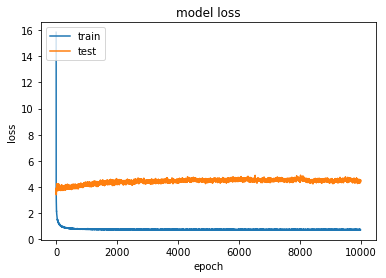

In [113]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [123]:
results = mlp_model_2.evaluate(X_test, y_test)

3968/4000 [============================>.] - ETA: 0s

In [124]:
print(results)

4.76732562065
